# Projeto - Análise de dados de críquete
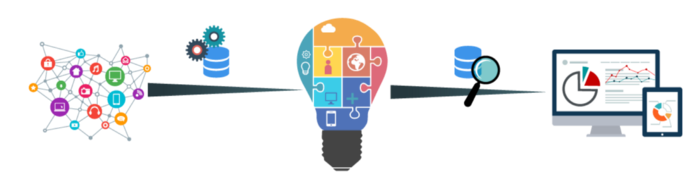

### Etapa 1 - Problema de negócio / Declaração do problema:<br>
> https://www.espncricinfo.com/records/tournament/team-match-results/icc-men-s-t20-world-cup-2022-23-14450 <br>
> https://www.youtube.com/watch?v=4QkYy1wANXA&ab_channel=codebasics <br>
> https://github.com/codebasics/DataAnalysisProjects/tree/master/5_CricketT20Analytics/data_collection

### Etapa 2 - Definição da Baseline: <br>
##### Baseline: Um ponto de partida, uma referência. São os resultados que a solução atual está trazendo para o problema de negócio em questão. É uma previsão do resultado com base na experiência e métricas atuais. <br>
##### Esta é a primeira vez que está sendo realizado esse tipo de análise, por tanto, não existe uma referência.

### Etapa 3 - Planejamento: <br>
##### Criação de um arquivo (Planejamento.txt) com as seguintes definições: 
* a) Informar os pré-requisitos.
* b) Realizar a decomposição do problema.
* c) Escrever um plano de projeto que estime o impacto, o esforço, os riscos, determine a responsabilidade de cada parte interessada e decide se deve ou não prosseguir com o projeto.
* d) Definir o marcos para etapas intermediárias, um cronograma para atingir cada marco e escrever uma breve descrição de cada etapa.
* e) Informar o produto final
* f) Informar o processo
* g) Informar as ferramentas

### Etapa 4 - Coleta de Dados Brutos de Fontes Confiáveis: <br>
##### Envolve coletar os dados de uma variedade de fontes, seja baixando manualmente ou programaticamente, copiando a web (Raspagem de sites), acessando uma API ou até mesmo conectando-se a um banco de dados.

In [1]:
# 1 - Importação das Bibliotecas
import pandas as pd
import json

In [2]:
# 2 - Abrindo o arquivo Match Summary.json e transformando em Dataframe

# Match Summary = Resumo da partida

# Abrindo o arquivo JSON do Resumo da Partida e carregando os resultados em uma lista de dicionarios
with open("_datasets/t20_wc_match_results.json") as var_resultados:
    lista_dados_dict = json.load(var_resultados)
lista_dados_dict

[{'matchSummary': [{'team1': 'Namibia',
    'team2': 'Sri Lanka',
    'winner': 'Namibia',
    'margin': '55 runs',
    'ground': 'Geelong',
    'matchDate': 'Oct 16, 2022',
    'scorecard': 'T20I # 1823'},
   {'team1': 'Netherlands',
    'team2': 'U.A.E.',
    'winner': 'Netherlands',
    'margin': '3 wickets',
    'ground': 'Geelong',
    'matchDate': 'Oct 16, 2022',
    'scorecard': 'T20I # 1825'},
   {'team1': 'Scotland',
    'team2': 'West Indies',
    'winner': 'Scotland',
    'margin': '42 runs',
    'ground': 'Hobart',
    'matchDate': 'Oct 17, 2022',
    'scorecard': 'T20I # 1826'},
   {'team1': 'Ireland',
    'team2': 'Zimbabwe',
    'winner': 'Zimbabwe',
    'margin': '31 runs',
    'ground': 'Hobart',
    'matchDate': 'Oct 17, 2022',
    'scorecard': 'T20I # 1828'},
   {'team1': 'Namibia',
    'team2': 'Netherlands',
    'winner': 'Netherlands',
    'margin': '5 wickets',
    'ground': 'Geelong',
    'matchDate': 'Oct 18, 2022',
    'scorecard': 'T20I # 1830'},
   {'team1':

In [3]:
# Uma lista com apenas o elemento matchSummary, sendo seu valor uma outra lista com 45 dicionários.
len(lista_dados_dict[0]["matchSummary"]) # 0 a 44

45

In [4]:
# Trandormando uma lista com apenas o elemento matchSummary em um Dataframe
df_partida = pd.DataFrame(lista_dados_dict[0]["matchSummary"])
df_partida.head()

,team1,team2,winner,margin,ground,matchDate,scorecard
0,Namibia,Sri Lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823
1,Netherlands,U.A.E.,Netherlands,3 wickets,Geelong,"Oct 16, 2022",T20I # 1825
2,Scotland,West Indies,Scotland,42 runs,Hobart,"Oct 17, 2022",T20I # 1826
3,Ireland,Zimbabwe,Zimbabwe,31 runs,Hobart,"Oct 17, 2022",T20I # 1828
4,Namibia,Netherlands,Netherlands,5 wickets,Geelong,"Oct 18, 2022",T20I # 1830


In [5]:
# Dataframe com 45 linhas e 7 colunas
df_partida.shape

(45, 7)

In [6]:
# 3 - Abrindo o arquivo Batting Summary.json e transformando em Dataframe
# Batting Summary = Resumo de rebatidas

# Abrindo o arquivo JSON e carregando os resultados em uma lista de dicionarios
with open("_datasets/t20_wc_batting_summary.json") as var_resultados:
    lista_dados_dict = json.load(var_resultados)
lista_dados_dict

[{'battingSummary': [{'match': 'Namibia Vs Sri Lanka',
    'teamInnings': 'Namibia',
    'battingPos': 1,
    'batsmanName': 'Michael van Lingen',
    'dismissal': 'c Pramod Madushan b Chameera',
    'runs': '3',
    'balls': '6',
    '4s': '0',
    '6s': '0',
    'SR': '50.00'},
   {'match': 'Namibia Vs Sri Lanka',
    'teamInnings': 'Namibia',
    'battingPos': 2,
    'batsmanName': 'Divan la Cock',
    'dismissal': 'c Shanaka b Pramod Madushan',
    'runs': '9',
    'balls': '9',
    '4s': '1',
    '6s': '0',
    'SR': '100.00'},
   {'match': 'Namibia Vs Sri Lanka',
    'teamInnings': 'Namibia',
    'battingPos': 3,
    'batsmanName': 'Jan Nicol Loftie-Eaton',
    'dismissal': 'c â€\xa0Mendis b Karunaratne',
    'runs': '20',
    'balls': '12',
    '4s': '1',
    '6s': '2',
    'SR': '166.66'},
   {'match': 'Namibia Vs Sri Lanka',
    'teamInnings': 'Namibia',
    'battingPos': 4,
    'batsmanName': 'Stephan Baard',
    'dismissal': 'c DM de Silva b Pramod Madushan',
    'runs': '26

In [7]:
# Uma lista com 45 elementos
len(lista_dados_dict) # 0 a 44

45

In [8]:
# Cada elemento da lista, por exemplo, o 1° elemento (indice 0), possui apenas um dicionário "battingSummary", sendo seu valor uma outra lista com 19 dicionários.  
len(lista_dados_dict[0]['battingSummary']) # 0 a 19

19

In [9]:
lista_registros = []
for elementos in lista_dados_dict:
    lista_registros.extend(elementos['battingSummary'])
lista_registros

[{'match': 'Namibia Vs Sri Lanka',
  'teamInnings': 'Namibia',
  'battingPos': 1,
  'batsmanName': 'Michael van Lingen',
  'dismissal': 'c Pramod Madushan b Chameera',
  'runs': '3',
  'balls': '6',
  '4s': '0',
  '6s': '0',
  'SR': '50.00'},
 {'match': 'Namibia Vs Sri Lanka',
  'teamInnings': 'Namibia',
  'battingPos': 2,
  'batsmanName': 'Divan la Cock',
  'dismissal': 'c Shanaka b Pramod Madushan',
  'runs': '9',
  'balls': '9',
  '4s': '1',
  '6s': '0',
  'SR': '100.00'},
 {'match': 'Namibia Vs Sri Lanka',
  'teamInnings': 'Namibia',
  'battingPos': 3,
  'batsmanName': 'Jan Nicol Loftie-Eaton',
  'dismissal': 'c â€\xa0Mendis b Karunaratne',
  'runs': '20',
  'balls': '12',
  '4s': '1',
  '6s': '2',
  'SR': '166.66'},
 {'match': 'Namibia Vs Sri Lanka',
  'teamInnings': 'Namibia',
  'battingPos': 4,
  'batsmanName': 'Stephan Baard',
  'dismissal': 'c DM de Silva b Pramod Madushan',
  'runs': '26',
  'balls': '24',
  '4s': '2',
  '6s': '0',
  'SR': '108.33'},
 {'match': 'Namibia Vs Sr

In [10]:
len(lista_registros) # 0 a 698

699

In [11]:
df_rebatidas = pd.DataFrame(lista_registros)
df_rebatidas.head()

,match,teamInnings,battingPos,batsmanName,dismissal,runs,balls,4s,6s,SR
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,c Pramod Madushan b Chameera,3,6,0,0,50.00
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,c Shanaka b Pramod Madushan,9,9,1,0,100.00
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,c â€ Mendis b Karunaratne,20,12,1,2,166.66
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,c DM de Silva b Pramod Madushan,26,24,2,0,108.33
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),c Gunathilaka b PWH de Silva,20,24,0,0,83.33


In [12]:
df_rebatidas.tail()

,match,teamInnings,battingPos,batsmanName,dismissal,runs,balls,4s,6s,SR
694,Pakistan Vs England,England,3,Phil Salt,c Iftikhar Ahmed b Haris Rauf,10,9,2,0,111.11
695,Pakistan Vs England,England,4,Ben Stokes,,52,49,5,1,106.12
696,Pakistan Vs England,England,5,Harry Brook,c Shaheen Shah Afridi b Shadab Khan,20,23,1,0,86.95
697,Pakistan Vs England,England,6,Moeen Ali,b Mohammad Wasim,19,13,3,0,146.15
698,Pakistan Vs England,England,7,Liam Livingstone,,1,1,0,0,100.00


In [13]:
# 4 - Abrindo o arquivo Bowling Summary.json e transformando em Dataframe

with open("_datasets/t20_wc_bowling_summary.json") as var_resultados:
    lista_dados_dict = json.load(var_resultados)
lista_dados_dict

[{'bowlingSummary': [{'match': 'Namibia Vs Sri Lanka',
    'bowlingTeam': 'Sri Lanka',
    'bowlerName': 'Maheesh Theekshana',
    'overs': '4',
    'maiden': '0',
    'runs': '23',
    'wickets': '1',
    'economy': '5.75',
    '0s': '7',
    '4s': '0',
    '6s': '0',
    'wides': '2',
    'noBalls': '0'},
   {'match': 'Namibia Vs Sri Lanka',
    'bowlingTeam': 'Sri Lanka',
    'bowlerName': 'Dushmantha Chameera',
    'overs': '4',
    'maiden': '0',
    'runs': '39',
    'wickets': '1',
    'economy': '9.75',
    '0s': '6',
    '4s': '3',
    '6s': '1',
    'wides': '2',
    'noBalls': '0'},
   {'match': 'Namibia Vs Sri Lanka',
    'bowlingTeam': 'Sri Lanka',
    'bowlerName': 'Pramod Madushan',
    'overs': '4',
    'maiden': '0',
    'runs': '37',
    'wickets': '2',
    'economy': '9.25',
    '0s': '6',
    '4s': '3',
    '6s': '1',
    'wides': '0',
    'noBalls': '0'},
   {'match': 'Namibia Vs Sri Lanka',
    'bowlingTeam': 'Sri Lanka',
    'bowlerName': 'Chamika Karunaratne',
 

In [14]:
# Uma lista com 45 elementos
len(lista_dados_dict) # 0 a 44

45

In [15]:
# Cada elemento da lista, por exemplo, o 1° elemento (indice 0), possui apenas um dicionário "bowlingSummary", sendo seu valor uma outra lista com 11 dicionários.  
len(lista_dados_dict[0]['bowlingSummary']) # 0 a 11

11

In [16]:
lista_registros = []
for elementos in lista_dados_dict:
    lista_registros.extend(elementos['bowlingSummary'])
lista_registros

[{'match': 'Namibia Vs Sri Lanka',
  'bowlingTeam': 'Sri Lanka',
  'bowlerName': 'Maheesh Theekshana',
  'overs': '4',
  'maiden': '0',
  'runs': '23',
  'wickets': '1',
  'economy': '5.75',
  '0s': '7',
  '4s': '0',
  '6s': '0',
  'wides': '2',
  'noBalls': '0'},
 {'match': 'Namibia Vs Sri Lanka',
  'bowlingTeam': 'Sri Lanka',
  'bowlerName': 'Dushmantha Chameera',
  'overs': '4',
  'maiden': '0',
  'runs': '39',
  'wickets': '1',
  'economy': '9.75',
  '0s': '6',
  '4s': '3',
  '6s': '1',
  'wides': '2',
  'noBalls': '0'},
 {'match': 'Namibia Vs Sri Lanka',
  'bowlingTeam': 'Sri Lanka',
  'bowlerName': 'Pramod Madushan',
  'overs': '4',
  'maiden': '0',
  'runs': '37',
  'wickets': '2',
  'economy': '9.25',
  '0s': '6',
  '4s': '3',
  '6s': '1',
  'wides': '0',
  'noBalls': '0'},
 {'match': 'Namibia Vs Sri Lanka',
  'bowlingTeam': 'Sri Lanka',
  'bowlerName': 'Chamika Karunaratne',
  'overs': '4',
  'maiden': '0',
  'runs': '36',
  'wickets': '1',
  'economy': '9.00',
  '0s': '7',
  

In [17]:
len(lista_registros) # 0 a 499

500

In [18]:
df_criquete = pd.DataFrame(lista_registros)
df_criquete.head(10)

,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
0,Namibia Vs Sri Lanka,Sri Lanka,Maheesh Theekshana,4,0,23,1,5.75,7,0,0,2,0
1,Namibia Vs Sri Lanka,Sri Lanka,Dushmantha Chameera,4,0,39,1,9.75,6,3,1,2,0
2,Namibia Vs Sri Lanka,Sri Lanka,Pramod Madushan,4,0,37,2,9.25,6,3,1,0,0
3,Namibia Vs Sri Lanka,Sri Lanka,Chamika Karunaratne,4,0,36,1,9.00,7,3,1,1,0
4,Namibia Vs Sri Lanka,Sri Lanka,Wanindu Hasaranga de Silva,4,0,27,1,6.75,8,1,1,0,0
5,Namibia Vs Sri Lanka,Namibia,Gerhard Erasmus,1,0,8,0,8.00,1,1,0,0,0
6,Namibia Vs Sri Lanka,Namibia,David Wiese,4,0,16,2,4.00,13,1,0,0,0
7,Namibia Vs Sri Lanka,Namibia,Bernard Scholtz,4,0,18,2,4.50,10,1,0,0,0
8,Namibia Vs Sri Lanka,Namibia,Ben Shikongo,3,1,22,2,7.33,6,3,0,0,0
9,Namibia Vs Sri Lanka,Namibia,JJ Smit,3,0,16,1,5.33,7,0,0,1,0


In [19]:
# 4 - Abrindo o arquivo player_info.json e transformando em Dataframe
with open("_datasets/t20_wc_player_info.json") as var_resultados:
    lista_dados_dict = json.load(var_resultados)
lista_dados_dict

[{'name': 'Michael van Lingen',
  'team': 'Namibia',
  'battingStyle': 'Left hand Bat',
  'bowlingStyle': 'Left arm Medium',
  'playingRole': 'Bowling Allrounder',
  'description': ''},
 {'name': 'Divan la Cock',
  'team': 'Namibia',
  'battingStyle': 'Right hand Bat',
  'bowlingStyle': 'Legbreak',
  'playingRole': 'Opening Batter',
  'description': ''},
 {'name': 'Jan Nicol Loftie-Eaton',
  'team': 'Namibia',
  'battingStyle': 'Left hand Bat',
  'bowlingStyle': 'Right arm Medium, Legbreak',
  'playingRole': 'Batter',
  'description': ''},
 {'name': 'Stephan Baard',
  'team': 'Namibia',
  'battingStyle': 'Right hand Bat',
  'bowlingStyle': 'Right arm Medium fast',
  'playingRole': 'Batter',
  'description': ''},
 {'name': 'Gerhard Erasmus(c)',
  'team': 'Namibia',
  'battingStyle': 'Right hand Bat',
  'bowlingStyle': 'Right arm Offbreak',
  'playingRole': 'Allrounder',
  'description': ''},
 {'name': 'Jan Frylinck',
  'team': 'Namibia',
  'battingStyle': 'Left hand Bat',
  'bowlingStyl

In [20]:
# Uma lista com 219 elementos
len(lista_dados_dict) # 0 a 218

219

In [21]:
df_info_jogadores = pd.DataFrame(lista_dados_dict)
df_info_jogadores.head(10)

,name,team,battingStyle,bowlingStyle,playingRole,description
0,Michael van Lingen,Namibia,Left hand Bat,Left arm Medium,Bowling Allrounder,
1,Divan la Cock,Namibia,Right hand Bat,Legbreak,Opening Batter,
2,Jan Nicol Loftie-Eaton,Namibia,Left hand Bat,"Right arm Medium, Legbreak",Batter,
3,Stephan Baard,Namibia,Right hand Bat,Right arm Medium fast,Batter,
4,Gerhard Erasmus(c),Namibia,Right hand Bat,Right arm Offbreak,Allrounder,
5,Jan Frylinck,Namibia,Left hand Bat,Left arm Fast medium,Allrounder,
6,David Wiese,Namibia,Right hand Bat,Right arm Medium fast,Allrounder,David Wiese joined a marked outflow of South A...
7,JJ Smit,Namibia,Right hand Bat,Left arm Medium fast,Bowling Allrounder,
8,Pathum Nissanka,Sri Lanka,Right hand Bat,,Top order Batter,
9,Kusal Mendisâ€,Sri Lanka,Right hand Bat,Legbreak,Wicketkeeper Batter,"Blessed with a compact technique, an aggressiv..."


### Etapa 5 - Limpeza e Processamento de Dados

### Nome das colunas do arquivo json com os resultados do jogo: 
* team1 = time 1     
* team2	= time 2
* winner = vencedor	
* margin = margem
* ground = terreno
* matchDate	= data do jogo
* scorecard = tabela de desempenho

In [22]:
# Renomeando os nomes das colunas para português
df_partida.rename({"team1":"time_1"}, axis=1, inplace = True)
df_partida.rename({"team2":"time_2"}, axis=1, inplace = True)
df_partida.rename({"winner":"vencedor"}, axis=1, inplace = True)
df_partida.rename({"margin":"margem"}, axis=1, inplace = True)
df_partida.rename({"ground":"terreno"}, axis=1, inplace = True)
df_partida.rename({"matchDate":"data_jogo"}, axis=1, inplace = True)
# Por se tratar de uma chave primária das outras tabelas, por renomearemos como match_id (Id da Partida)
df_partida.rename({"scorecard":"id_partida"}, axis=1, inplace = True)
df_partida.head()

,time_1,time_2,vencedor,margem,terreno,data_jogo,id_partida
0,Namibia,Sri Lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823
1,Netherlands,U.A.E.,Netherlands,3 wickets,Geelong,"Oct 16, 2022",T20I # 1825
2,Scotland,West Indies,Scotland,42 runs,Hobart,"Oct 17, 2022",T20I # 1826
3,Ireland,Zimbabwe,Zimbabwe,31 runs,Hobart,"Oct 17, 2022",T20I # 1828
4,Namibia,Netherlands,Netherlands,5 wickets,Geelong,"Oct 18, 2022",T20I # 1830


### Nome das colunas do arquivo json com os resumos das rebatidas:
* match = partidas (corresponder)
* teamInnings = turnos da equipe
* battingPos = posição de rebatidas
* batsmanName = nome do batedor
* dismissal = demissão
* runs = corre
* balls = bolas
* 4s	
* 6s	
* SR

In [23]:
# Renomeando os nomes das colunas para português
df_rebatidas.rename({"match":"partidas"}, axis=1, inplace = True)
df_rebatidas.rename({"teamInnings":"turnos_equipe"}, axis=1, inplace = True)
df_rebatidas.rename({"battingPos":"posicao_rebatidas"}, axis=1, inplace = True)
df_rebatidas.rename({"batsmanName":"nome_batedor"}, axis=1, inplace = True)
df_rebatidas.rename({"dismissal":"demissao"}, axis=1, inplace = True)
df_rebatidas.rename({"runs":"corre"}, axis=1, inplace = True)
df_rebatidas.rename({"balls":"bolas"}, axis=1, inplace = True)
df_rebatidas.head(10)

,partidas,turnos_equipe,posicao_rebatidas,nome_batedor,demissao,corre,bolas,4s,6s,SR
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,c Pramod Madushan b Chameera,3,6,0,0,50.00
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,c Shanaka b Pramod Madushan,9,9,1,0,100.00
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,c â€ Mendis b Karunaratne,20,12,1,2,166.66
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,c DM de Silva b Pramod Madushan,26,24,2,0,108.33
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),c Gunathilaka b PWH de Silva,20,24,0,0,83.33
5,Namibia Vs Sri Lanka,Namibia,6,Jan Frylinck,run out (Gunathilaka/â€ Mendis),44,28,4,0,157.14
6,Namibia Vs Sri Lanka,Namibia,7,David Wiese,c â€ Mendis b Theekshana,0,1,0,0,0.00
7,Namibia Vs Sri Lanka,Namibia,8,JJ Smit,,31,16,2,2,193.75
8,Namibia Vs Sri Lanka,Sri Lanka,1,Pathum Nissanka,c Smit b Shikongo,9,10,1,0,90.00
9,Namibia Vs Sri Lanka,Sri Lanka,2,Kusal Mendisâ€,c â€ Green b Wiese,6,6,0,0,100.00


In [24]:
# A inclusão da coluna Ativo/Inativo no conjunto de dados utilizando a coluna Demissão como base
# Aplicou "Ativo" para as linhas que tinha string maior que 0 e "Inativo" para linha vazia da coluna Demissão
df_rebatidas["Ativo/Inativo"] = df_rebatidas.demissao.apply(lambda x: 'Ativo' if len(x) > 0 else "Inativo")
df_rebatidas.head(10)

,partidas,turnos_equipe,posicao_rebatidas,nome_batedor,demissao,corre,bolas,4s,6s,SR,Ativo/Inativo
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,c Pramod Madushan b Chameera,3,6,0,0,50.00,Ativo
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,c Shanaka b Pramod Madushan,9,9,1,0,100.00,Ativo
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,c â€ Mendis b Karunaratne,20,12,1,2,166.66,Ativo
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,c DM de Silva b Pramod Madushan,26,24,2,0,108.33,Ativo
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),c Gunathilaka b PWH de Silva,20,24,0,0,83.33,Ativo
5,Namibia Vs Sri Lanka,Namibia,6,Jan Frylinck,run out (Gunathilaka/â€ Mendis),44,28,4,0,157.14,Ativo
6,Namibia Vs Sri Lanka,Namibia,7,David Wiese,c â€ Mendis b Theekshana,0,1,0,0,0.00,Ativo
7,Namibia Vs Sri Lanka,Namibia,8,JJ Smit,,31,16,2,2,193.75,Inativo
8,Namibia Vs Sri Lanka,Sri Lanka,1,Pathum Nissanka,c Smit b Shikongo,9,10,1,0,90.00,Ativo
9,Namibia Vs Sri Lanka,Sri Lanka,2,Kusal Mendisâ€,c â€ Green b Wiese,6,6,0,0,100.00,Ativo


In [25]:
# Exclusão da coluna Demissão, pois não é mais util no conjunto de dados
df_rebatidas.drop(columns=["demissao"], inplace=True)
df_rebatidas.head(10)

,partidas,turnos_equipe,posicao_rebatidas,nome_batedor,corre,bolas,4s,6s,SR,Ativo/Inativo
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,Ativo
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,100.00,Ativo
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,166.66,Ativo
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,108.33,Ativo
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),20,24,0,0,83.33,Ativo
5,Namibia Vs Sri Lanka,Namibia,6,Jan Frylinck,44,28,4,0,157.14,Ativo
6,Namibia Vs Sri Lanka,Namibia,7,David Wiese,0,1,0,0,0.00,Ativo
7,Namibia Vs Sri Lanka,Namibia,8,JJ Smit,31,16,2,2,193.75,Inativo
8,Namibia Vs Sri Lanka,Sri Lanka,1,Pathum Nissanka,9,10,1,0,90.00,Ativo
9,Namibia Vs Sri Lanka,Sri Lanka,2,Kusal Mendisâ€,6,6,0,0,100.00,Ativo


In [26]:
# Substituindo caracteres especiais da coluna Nome_batedor
df_rebatidas["nome_batedor"] = df_rebatidas.nome_batedor.apply(lambda x: x.replace('â€',''))
df_rebatidas["nome_batedor"] = df_rebatidas.nome_batedor.apply(lambda x: x.replace('\xa0', ''))
df_rebatidas.head(10)

,partidas,turnos_equipe,posicao_rebatidas,nome_batedor,corre,bolas,4s,6s,SR,Ativo/Inativo
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,Ativo
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,100.00,Ativo
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,166.66,Ativo
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,108.33,Ativo
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),20,24,0,0,83.33,Ativo
5,Namibia Vs Sri Lanka,Namibia,6,Jan Frylinck,44,28,4,0,157.14,Ativo
6,Namibia Vs Sri Lanka,Namibia,7,David Wiese,0,1,0,0,0.00,Ativo
7,Namibia Vs Sri Lanka,Namibia,8,JJ Smit,31,16,2,2,193.75,Inativo
8,Namibia Vs Sri Lanka,Sri Lanka,1,Pathum Nissanka,9,10,1,0,90.00,Ativo
9,Namibia Vs Sri Lanka,Sri Lanka,2,Kusal Mendis,6,6,0,0,100.00,Ativo


In [27]:
# Criação de um dicionário com os Ids das partidas para ser utilizado como Chave primária das outras tabelas
dict_ids_partidas = {}

for indice, linha in df_partida.iterrows():
    chave1 = linha['time_1'] + " Vs " + linha['time_2']
    chave2 = linha['time_2'] + " Vs " + linha['time_1']
    
    dict_ids_partidas[chave1] = linha['id_partida']
    dict_ids_partidas[chave2] = linha['id_partida']

dict_ids_partidas

{'Namibia Vs Sri Lanka': 'T20I # 1823',
 'Sri Lanka Vs Namibia': 'T20I # 1823',
 'Netherlands Vs U.A.E.': 'T20I # 1825',
 'U.A.E. Vs Netherlands': 'T20I # 1825',
 'Scotland Vs West Indies': 'T20I # 1826',
 'West Indies Vs Scotland': 'T20I # 1826',
 'Ireland Vs Zimbabwe': 'T20I # 1828',
 'Zimbabwe Vs Ireland': 'T20I # 1828',
 'Namibia Vs Netherlands': 'T20I # 1830',
 'Netherlands Vs Namibia': 'T20I # 1830',
 'Sri Lanka Vs U.A.E.': 'T20I # 1832',
 'U.A.E. Vs Sri Lanka': 'T20I # 1832',
 'Ireland Vs Scotland': 'T20I # 1833',
 'Scotland Vs Ireland': 'T20I # 1833',
 'West Indies Vs Zimbabwe': 'T20I # 1834',
 'Zimbabwe Vs West Indies': 'T20I # 1834',
 'Netherlands Vs Sri Lanka': 'T20I # 1835',
 'Sri Lanka Vs Netherlands': 'T20I # 1835',
 'Namibia Vs U.A.E.': 'T20I # 1836',
 'U.A.E. Vs Namibia': 'T20I # 1836',
 'Ireland Vs West Indies': 'T20I # 1837',
 'West Indies Vs Ireland': 'T20I # 1837',
 'Scotland Vs Zimbabwe': 'T20I # 1838',
 'Zimbabwe Vs Scotland': 'T20I # 1838',
 'Australia Vs New Zea

In [28]:
# Criação da coluna id_partida no DataFrame Rebatidas utilizando o dicionário criado com base do dicionário do DataFrame Partidas

# Utilize a coluna Partidas e execute para cada linha a correspondencia com o dicionario Ids partida e atribua seu valor 
df_rebatidas['id_partida'] = df_rebatidas['partidas'].map(dict_ids_partidas)
df_rebatidas.head(10)

,partidas,turnos_equipe,posicao_rebatidas,nome_batedor,corre,bolas,4s,6s,SR,Ativo/Inativo,id_partida
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,Ativo,T20I # 1823
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,100.00,Ativo,T20I # 1823
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,166.66,Ativo,T20I # 1823
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,108.33,Ativo,T20I # 1823
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),20,24,0,0,83.33,Ativo,T20I # 1823
5,Namibia Vs Sri Lanka,Namibia,6,Jan Frylinck,44,28,4,0,157.14,Ativo,T20I # 1823
6,Namibia Vs Sri Lanka,Namibia,7,David Wiese,0,1,0,0,0.00,Ativo,T20I # 1823
7,Namibia Vs Sri Lanka,Namibia,8,JJ Smit,31,16,2,2,193.75,Inativo,T20I # 1823
8,Namibia Vs Sri Lanka,Sri Lanka,1,Pathum Nissanka,9,10,1,0,90.00,Ativo,T20I # 1823
9,Namibia Vs Sri Lanka,Sri Lanka,2,Kusal Mendis,6,6,0,0,100.00,Ativo,T20I # 1823


### Nome das colunas do arquivo json com os resumos dos criquetes:
* match	= partidas (corresponder)
* bowlingTeam = equipe de criquetes
* bowlerName = Nome do jogador
* overs	= total de seis bolas arremessadas pelo arremessador 
* maiden = um over em que o arremessador não permitiu que o lado rebatedor marcasse uma única corrida.
* runs = corre
* wickets = Tipo uma baliza
* economy = economia
* 0s	
* 4s	
* 6s	
* wides	= largura
* noBalls = sem bolas

In [29]:
# Renomeando os nomes das colunas para português
df_criquete.rename({"match":"partidas"}, axis=1, inplace = True)
df_criquete.rename({"bowlingTeam":"equipe_criquetes"}, axis=1, inplace = True)
df_criquete.rename({"bowlerName":"nome_jogador"}, axis=1, inplace = True)
df_criquete.rename({"overs":"jogada_overs"}, axis=1, inplace = True)
df_criquete.rename({"maiden":"jogada_maiden"}, axis=1, inplace = True)
df_criquete.rename({"runs":"corre"}, axis=1, inplace = True)
df_criquete.rename({"wickets":"baliza_wickets"}, axis=1, inplace = True)
df_criquete.rename({"economy":"economia"}, axis=1, inplace = True)
df_criquete.rename({"wides":"largura"}, axis=1, inplace = True)
df_criquete.rename({"noBalls":"sem_bolas"}, axis=1, inplace = True)
df_criquete.head(10)

,partidas,equipe_criquetes,nome_jogador,jogada_overs,jogada_maiden,corre,baliza_wickets,economia,0s,4s,6s,largura,sem_bolas
0,Namibia Vs Sri Lanka,Sri Lanka,Maheesh Theekshana,4,0,23,1,5.75,7,0,0,2,0
1,Namibia Vs Sri Lanka,Sri Lanka,Dushmantha Chameera,4,0,39,1,9.75,6,3,1,2,0
2,Namibia Vs Sri Lanka,Sri Lanka,Pramod Madushan,4,0,37,2,9.25,6,3,1,0,0
3,Namibia Vs Sri Lanka,Sri Lanka,Chamika Karunaratne,4,0,36,1,9.00,7,3,1,1,0
4,Namibia Vs Sri Lanka,Sri Lanka,Wanindu Hasaranga de Silva,4,0,27,1,6.75,8,1,1,0,0
5,Namibia Vs Sri Lanka,Namibia,Gerhard Erasmus,1,0,8,0,8.00,1,1,0,0,0
6,Namibia Vs Sri Lanka,Namibia,David Wiese,4,0,16,2,4.00,13,1,0,0,0
7,Namibia Vs Sri Lanka,Namibia,Bernard Scholtz,4,0,18,2,4.50,10,1,0,0,0
8,Namibia Vs Sri Lanka,Namibia,Ben Shikongo,3,1,22,2,7.33,6,3,0,0,0
9,Namibia Vs Sri Lanka,Namibia,JJ Smit,3,0,16,1,5.33,7,0,0,1,0


In [30]:
# Criação da coluna id_partida no DataFrame Criquete utilizando o dicionário criado com base do dicionário do DataFrame Partidas

# Utilize a coluna Partidas e execute para cada linha a correspondencia com o dicionario Ids partida e atribua seu valor
df_criquete['id_partida'] = df_criquete['partidas'].map(dict_ids_partidas)
df_criquete.head(10)

,partidas,equipe_criquetes,nome_jogador,jogada_overs,jogada_maiden,corre,baliza_wickets,economia,0s,4s,6s,largura,sem_bolas,id_partida
0,Namibia Vs Sri Lanka,Sri Lanka,Maheesh Theekshana,4,0,23,1,5.75,7,0,0,2,0,T20I # 1823
1,Namibia Vs Sri Lanka,Sri Lanka,Dushmantha Chameera,4,0,39,1,9.75,6,3,1,2,0,T20I # 1823
2,Namibia Vs Sri Lanka,Sri Lanka,Pramod Madushan,4,0,37,2,9.25,6,3,1,0,0,T20I # 1823
3,Namibia Vs Sri Lanka,Sri Lanka,Chamika Karunaratne,4,0,36,1,9.00,7,3,1,1,0,T20I # 1823
4,Namibia Vs Sri Lanka,Sri Lanka,Wanindu Hasaranga de Silva,4,0,27,1,6.75,8,1,1,0,0,T20I # 1823
5,Namibia Vs Sri Lanka,Namibia,Gerhard Erasmus,1,0,8,0,8.00,1,1,0,0,0,T20I # 1823
6,Namibia Vs Sri Lanka,Namibia,David Wiese,4,0,16,2,4.00,13,1,0,0,0,T20I # 1823
7,Namibia Vs Sri Lanka,Namibia,Bernard Scholtz,4,0,18,2,4.50,10,1,0,0,0,T20I # 1823
8,Namibia Vs Sri Lanka,Namibia,Ben Shikongo,3,1,22,2,7.33,6,3,0,0,0,T20I # 1823
9,Namibia Vs Sri Lanka,Namibia,JJ Smit,3,0,16,1,5.33,7,0,0,1,0,T20I # 1823


### Nome das colunas do arquivo json com as informações dos jogadores:
* name = nome
* team = equipe
* battingStyle = estilo de rebatidas
* bowlingStyle = estilo de criquete
* playingRole = papel jogando
* description = descrição

In [31]:
# Renomeando os nomes das colunas para português

df_info_jogadores.rename({"name":"nome"}, axis=1, inplace = True)
df_info_jogadores.rename({"team":"equipe"}, axis=1, inplace = True)
df_info_jogadores.rename({"battingStyle":"estilo_rebatidas"}, axis=1, inplace = True)
df_info_jogadores.rename({"bowlingStyle":"estilo_criquete"}, axis=1, inplace = True)
df_info_jogadores.rename({"playingRole":"papel_jogando"}, axis=1, inplace = True)
df_info_jogadores.rename({"description":"descricao"}, axis=1, inplace = True)
df_info_jogadores.head(10)

,nome,equipe,estilo_rebatidas,estilo_criquete,papel_jogando,descricao
0,Michael van Lingen,Namibia,Left hand Bat,Left arm Medium,Bowling Allrounder,
1,Divan la Cock,Namibia,Right hand Bat,Legbreak,Opening Batter,
2,Jan Nicol Loftie-Eaton,Namibia,Left hand Bat,"Right arm Medium, Legbreak",Batter,
3,Stephan Baard,Namibia,Right hand Bat,Right arm Medium fast,Batter,
4,Gerhard Erasmus(c),Namibia,Right hand Bat,Right arm Offbreak,Allrounder,
5,Jan Frylinck,Namibia,Left hand Bat,Left arm Fast medium,Allrounder,
6,David Wiese,Namibia,Right hand Bat,Right arm Medium fast,Allrounder,David Wiese joined a marked outflow of South A...
7,JJ Smit,Namibia,Right hand Bat,Left arm Medium fast,Bowling Allrounder,
8,Pathum Nissanka,Sri Lanka,Right hand Bat,,Top order Batter,
9,Kusal Mendisâ€,Sri Lanka,Right hand Bat,Legbreak,Wicketkeeper Batter,"Blessed with a compact technique, an aggressiv..."


In [37]:
df_aux_jogadores = pd.read_csv('_datasets/dim_players.csv', sep=',')
df_aux_jogadores.head(14)

,name,team,image,battingStyle,bowlingStyle,playingRole,description
0,Najmul Hossain Shanto,Bangladesh,NaN,Left hand Bat,Right arm Offbreak,Top order Batter,Nazmul Hossain Shanto emerged from an unusual ...
1,Soumya Sarkar,Bangladesh,NaN,Left hand Bat,Right arm Medium fast,Middle order Batter,"A rarity among Bangladesh allrounders, top-ord..."
2,Litton Das,Bangladesh,NaN,Right hand Bat,NaN,Wicketkeeper Batter,Liton Das is the first wicketkeeper-batsman in...
3,Shakib Al Hasan(c),Bangladesh,NaN,Left hand Bat,Slow Left arm Orthodox,Allrounder,When the annals of Bangladesh cricket are sift...
4,Afif Hossain,Bangladesh,NaN,Left hand Bat,Right arm Offbreak,Allrounder,Bangladesh left-hander Afif Hossain made his T...
5,Mosaddek Hossain,Bangladesh,NaN,Right hand Bat,Right arm Offbreak,Middle order Batter,"Mosaddek Hossain, who comes from a family of c..."
6,Nurul Hasan,Bangladesh,NaN,Right hand Bat,NaN,Wicketkeeper Batter,"Nurul Hasan, who made his first-class debut in..."
7,Yasir Ali,Bangladesh,NaN,Right hand Bat,Right arm Offbreak,Middle order Batter,NaN
8,Wessly Madhevere,Zimbabwe,NaN,Right hand Bat,Right arm Offbreak,Allrounder,NaN
9,Craig Ervine(c),Zimbabwe,NaN,Left hand Bat,Right arm Offbreak,Middle order Batter,Few people in Zimbabwe cricket circles were su...


In [38]:
df_info_jogadores['imagem'] = df_aux_jogadores['image']

In [39]:
df_info_jogadores.head(14)

,nome,equipe,estilo_rebatidas,estilo_criquete,papel_jogando,descricao,imagem
0,Michael van Lingen,Namibia,Left hand Bat,Left arm Medium,Bowling Allrounder,,NaN
1,Divan la Cock,Namibia,Right hand Bat,Legbreak,Opening Batter,,NaN
2,Jan Nicol Loftie-Eaton,Namibia,Left hand Bat,"Right arm Medium, Legbreak",Batter,,NaN
3,Stephan Baard,Namibia,Right hand Bat,Right arm Medium fast,Batter,,NaN
4,Gerhard Erasmus(c),Namibia,Right hand Bat,Right arm Offbreak,Allrounder,,NaN
5,Jan Frylinck,Namibia,Left hand Bat,Left arm Fast medium,Allrounder,,NaN
6,David Wiese,Namibia,Right hand Bat,Right arm Medium fast,Allrounder,David Wiese joined a marked outflow of South A...,NaN
7,JJ Smit,Namibia,Right hand Bat,Left arm Medium fast,Bowling Allrounder,,NaN
8,Pathum Nissanka,Sri Lanka,Right hand Bat,,Top order Batter,,NaN
9,Kusal Mendisâ€,Sri Lanka,Right hand Bat,Legbreak,Wicketkeeper Batter,"Blessed with a compact technique, an aggressiv...",NaN


In [40]:
df_rebatidas.to_csv('_reports/Fato_Resumo_Rebatida.csv', index=True)
df_partida.to_csv('_reports/Dimensao_Resumo_Partida.csv', index=True)
df_criquete.to_csv('_reports/Fato_Resumo_Criquete.csv', index=True)
df_info_jogadores.to_csv('_reports/Dimensao_Resumo_Jogadores.csv', index=True)

### Etapa 6 - Análise Exploratória de Dados

### Etapa 7 - Preparação dos Dados (Modelagem dos dados)

### Etapa 8 - (Pré) Validação dos resultados com os clientes

### Etapa 9 - Storytelling dos processos e resultados